# Madeleine Curran - Stats 21 Project

The data here explores Spotify artists and tracks based on their popularity, genre, and a variety of audio features. Through this analysis, we aim to uncover what factors contribute to the popularity of tracks and artists on Spotify.

## 1. Data Cleaning and Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the CSV file
df = pd.read_csv('Spotify_track.csv')

# Cleaning missing values
df = df.dropna()

# Converting object columns to appropriate types
df['track_id'] = df['track_id'].astype('string')
df['artists'] = df['artists'].astype('string')
df['track_name'] = df['track_name'].astype('string')
df['album_name'] = df['album_name'].astype('string')
df['track_genre'] = df['track_genre'].astype('string')

# Dropping unnecessary columns
df = df.drop(columns = ['Unnamed: 0', 'time_signature'])

# Renaming columns for ease of use
df = df.rename(columns={'track_genre': 'genre', 'track_id': 'id', 'track_name': 'name', 'album_name': 'album'})

print(df.head())

                       id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                               album  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                         name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4   

## 2. Exploratory Data Analysis (EDA)

In [3]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                113999 non-null  string 
 1   artists           113999 non-null  string 
 2   album             113999 non-null  string 
 3   name              113999 non-null  string 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

### Danceability as a function of Genre

Danceability mean: 0.5668006429880964
genre
afrobeat      0.669580
country       0.555294
electronic    0.652945
hip-hop       0.736154
indie         0.587272
k-pop         0.647879
latin         0.721902
pop           0.630441
rock          0.543609
Name: danceability, dtype: float64
genre
afrobeat      0.974
country       0.942
electronic    0.954
hip-hop       0.964
indie         0.953
k-pop         0.935
latin         0.924
pop           0.918
rock          0.890
Name: danceability, dtype: float64
Genre with the max danceability out of the top 10 most counted genres: hip-hop
Describing danceability: count    8999.000000
mean        0.638341
std         0.144621
min         0.112000
25%         0.539000
50%         0.652000
75%         0.744000
max         0.974000
Name: danceability, dtype: float64


/var/folders/37/q677f9115p9dht5rmcl883yh0000gn/T/ipykernel_60233/3350560972.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='danceability', data=df_top, palette='Set2')


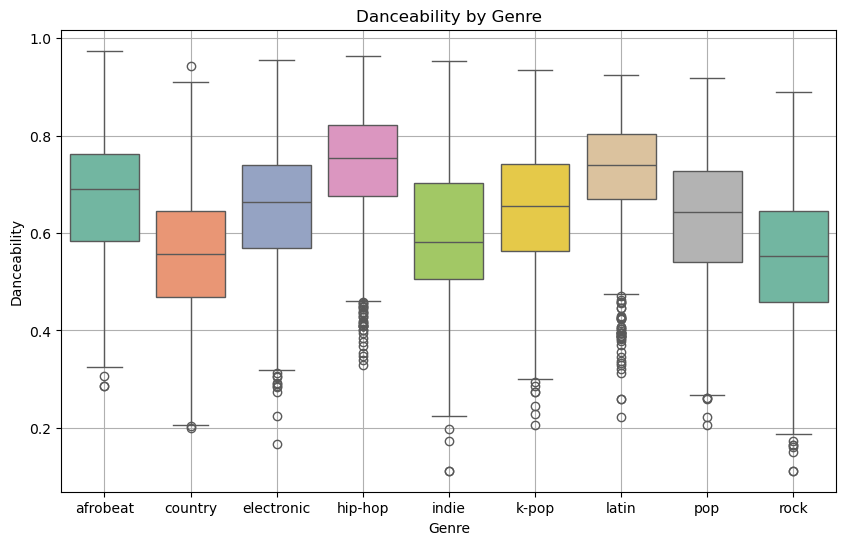

In [ ]:
print(f"Danceability mean: {df['danceability'].mean()}")

top_genres = [
    "pop",
    "hip-hop",
    "rap",
    "electronic",
    "rock",
    "afrobeat",
    "k-pop",
    "country",
    "latin",
    "indie"
]

# Creating a new DataFrame with only specific genres
df_top = df[df['genre'].isin(top_genres)]

# Calculating the mean danceability score for the top genres
genre_danceability = df_top.groupby('genre')['danceability'].mean()
print(genre_danceability)

# Finding the genre with the maximum danceability
max_danceability = df_top.groupby('genre')['danceability'].max()
print(max_danceability)

max_danceability_genre = genre_danceability.idxmax()
print(f"Genre with the max danceability out of the top 10 most counted genres: {max_danceability_genre}")
print(f"Describing danceability: {df_top['danceability'].describe()}")

# Plotting boxplots for danceability by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='danceability', data=df_top, palette='Set2')
plt.title('Danceability by Genre')
plt.ylabel('Danceability')
plt.xlabel('Genre')
plt.grid(True)
plt.show()


We can see here that danceability is very varied among the most popular music genres, with the mean danceability score of the most popular genres (0.64) being higher than the mean danceability score for all genres (0.57). Latin music has the highest mean danceability score and country music has the lowest. Afrobeat features the song with the highest danceability score, however.

### Are Explicit Lyrics More Popular?

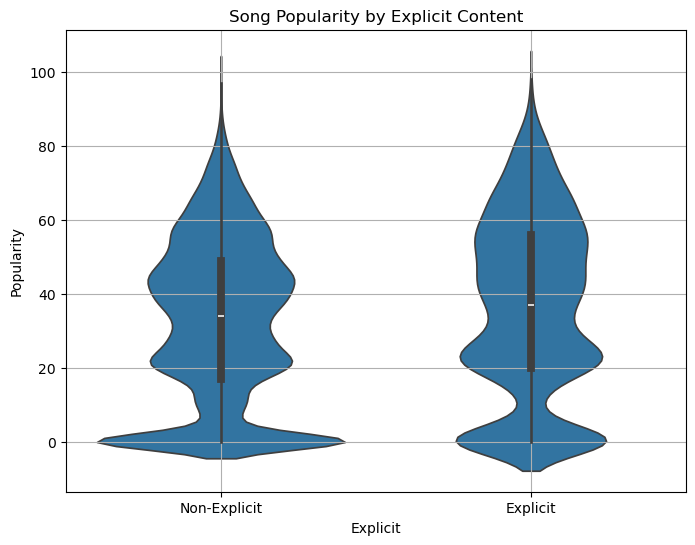

               count       mean  median        std  min  max
Non-Explicit  104252  32.938207    34.0  22.083641    0  100
Explicit        9747  36.454191    37.0  24.317510    0   98


In [ ]:
# Plotting a violin plot for song popularity by explicit content
plt.figure(figsize=(8,6))
sns.violinplot(x='explicit', y='popularity', data=df, inner='box')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.title('Song Popularity by Explicit Content')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Grouping by explicit content and calculating summary statistics for popularity
summary = df.groupby('explicit')['popularity'].agg([
    'count',     
    'mean',      
    'median',   
    'std',       
    'min',       
    'max'        
])

summary.index = ['Non-Explicit', 'Explicit']

print(summary)

Based on the plot and statistics above, it would seem that songs with explicit content are generally more popular than those without, although not by much. Non-explicit songs do have a higher cluster of data around the 0 popularity score and the 50 mark.

### Distribution of Track Popularity

In [ ]:
# Summary statistics for popularity
pop_summary = df['popularity'].describe()
print("Summary Statistics for Popularity:\n", pop_summary)
print("\nAdditional Info:")
print("Median:", df['popularity'].median())
print("Skewness:", df['popularity'].skew())
print("Number of Unique Popularity Scores:", df['popularity'].nunique())
print("Most Common Popularity Scores:\n", df['popularity'].value_counts().head())

Summary Statistics for Popularity:
 count    113999.000000
mean         33.238827
std          22.304959
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

Additional Info:
Median: 35.0
Skewness: 0.046393480720723884
Number of Unique Popularity Scores: 101
Most Common Popularity Scores:
 popularity
0     16019
22     2354
21     2344
44     2288
1      2140
Name: count, dtype: int64


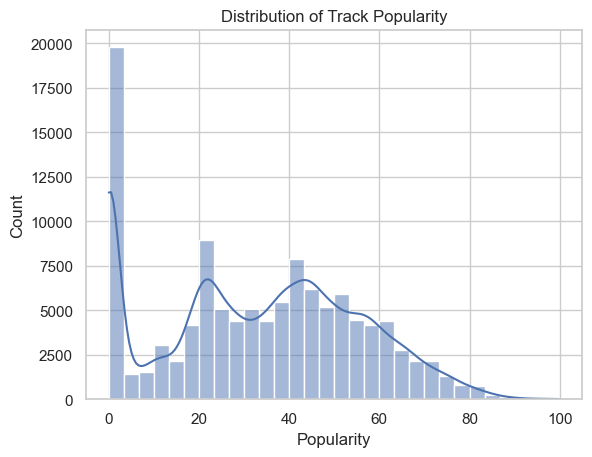

In [ ]:
# Hisogram of track popularity
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


The distribution of track popularity is skewed, with most tracks having a popularity score below 50 and many having a score of 0. Very few tracks have a popularity score above 90, indicating that the most popular tracks are quite rare. The mean popularity score is around 33, with the median being slightly higher at 35, suggetsing the mean is skewed downwards by the many tracks with low popularity scores.

### Correlation Between Different Audio Features

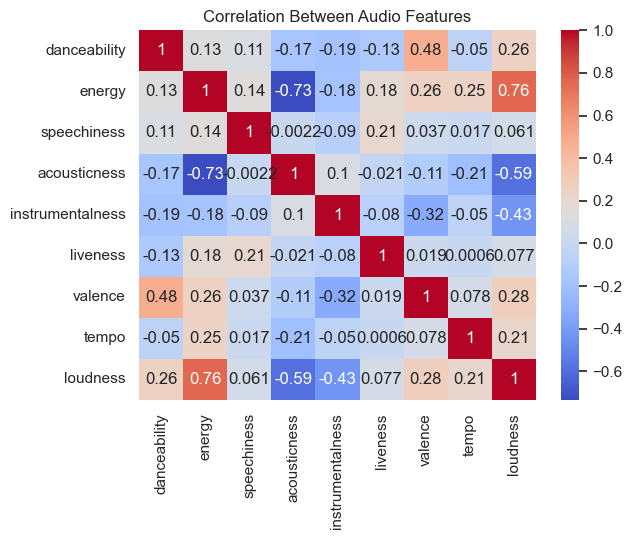

Descriptive Statistics for Pairwise Correlations:

count    36.000000
mean      0.008491
std       0.275062
min      -0.733908
25%      -0.113216
50%       0.018184
75%       0.153080
max       0.761690
dtype: float64

Skewness: -0.23104881190474788


In [ ]:
# Grouping key audio features
features = ['danceability', 'energy', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness']

corr = df[features].corr()

# Plotting the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()

# Descriptive statistics for pairwise correlations
corr_matrix = df[features].corr()
upper_triangle_values = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlations = upper_triangle_values.stack()
summary_stats = correlations.describe()
print("Descriptive Statistics for Pairwise Correlations:\n")
print(summary_stats)
print("\nSkewness:", correlations.skew())

Based on the correlation matrix, we can see that energy and loudness are the most strongly positively correlated features, while acousticness and energy are the most negatively correlated. This suggests that tracks with high energy tend to be louder and those with high acousticness tend to have lower energy. Danceability is also positively correlated with energy and loudness, indicating that more energetic and louder tracks are generally more danceable.

## 3. Visualization

#### Danceability vs. Energy 

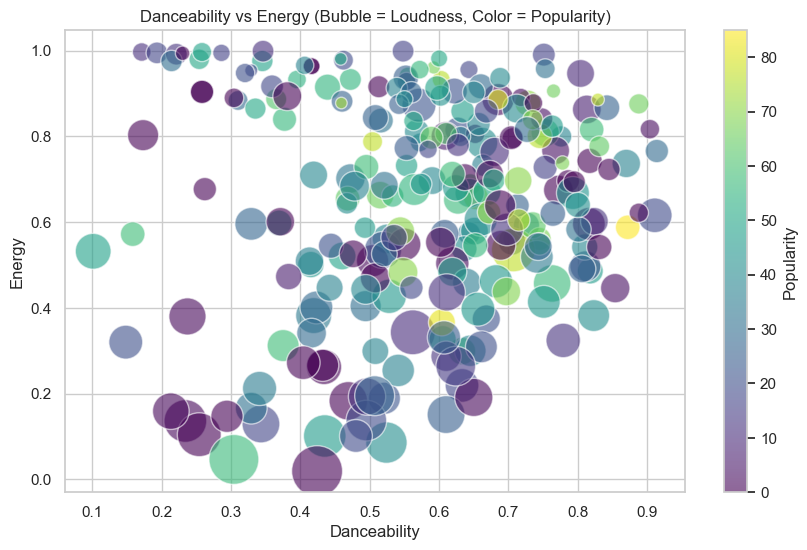

In [ ]:
# Sampling 250 random tracks for visualization
df_sampled = df.sample(n=250, random_state=42)
df_sampled['loudness_abs'] = df_sampled['loudness'].abs()

# Plotting a bubble chart for danceability vs energy with information on loudness and popularity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_sampled['danceability'],
    df_sampled['energy'],
    s=df_sampled['loudness_abs'] * 50,  
    c=df_sampled['popularity'],        
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)

plt.colorbar(scatter, label='Popularity')
plt.title('Danceability vs Energy (Bubble = Loudness, Color = Popularity)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

#### Liveness

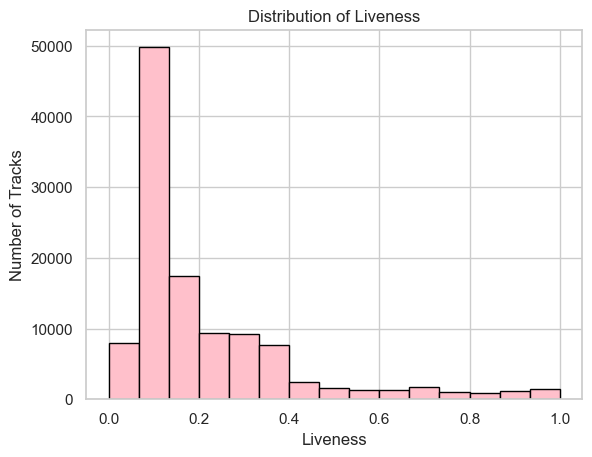

In [ ]:
# Plotting a histogram for liveness
plt.hist(df['liveness'], bins=15, color='pink', edgecolor='black')
plt.title('Distribution of Liveness')
plt.xlabel('Liveness')
plt.ylabel('Number of Tracks')
plt.show()

#### Proportion of Explicit Tracks

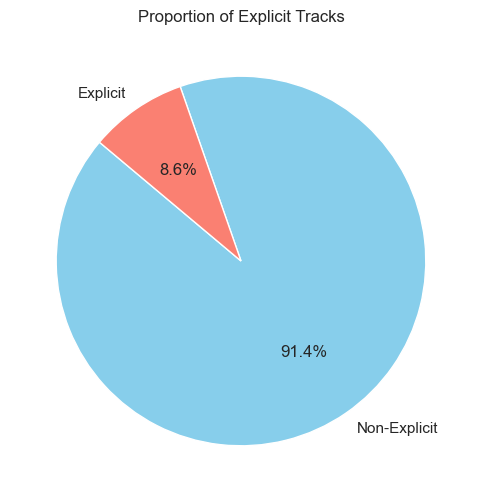

In [ ]:
explicit_counts = df['explicit'].value_counts()

# Plotting a pie chart for explicit vs non-explicit tracks
plt.figure(figsize=(6,6))
plt.pie(explicit_counts, labels=['Non-Explicit', 'Explicit'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Proportion of Explicit Tracks')
plt.show()

## 4. Simple Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression to predict popularity based on danceability and energy
x = df[['danceability', 'energy']]
y = df['popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 495.4910627375402
R-squared: 0.0012062556983751804
Coefficients: [ 4.57540441 -0.43743971]
Intercept: 30.98512283185055


The goal here is to predict the popularity of a track based on danceability and energy. The Mean Squared Error is 495, which indicates that the model is not very accurate. The R^2 value also suggests that the model only explains a very small percentage of the variability in track popularity. The first coefficient indicates that for a one-unit increase in danceability, the popularity score is predicted to increase by 4.58 units. The second coefficient indicates that for a one-unit increase in energy, the popularity score is predicted to decrease by 0.44 units. 